<ipython-input-14-3a04eec70604>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


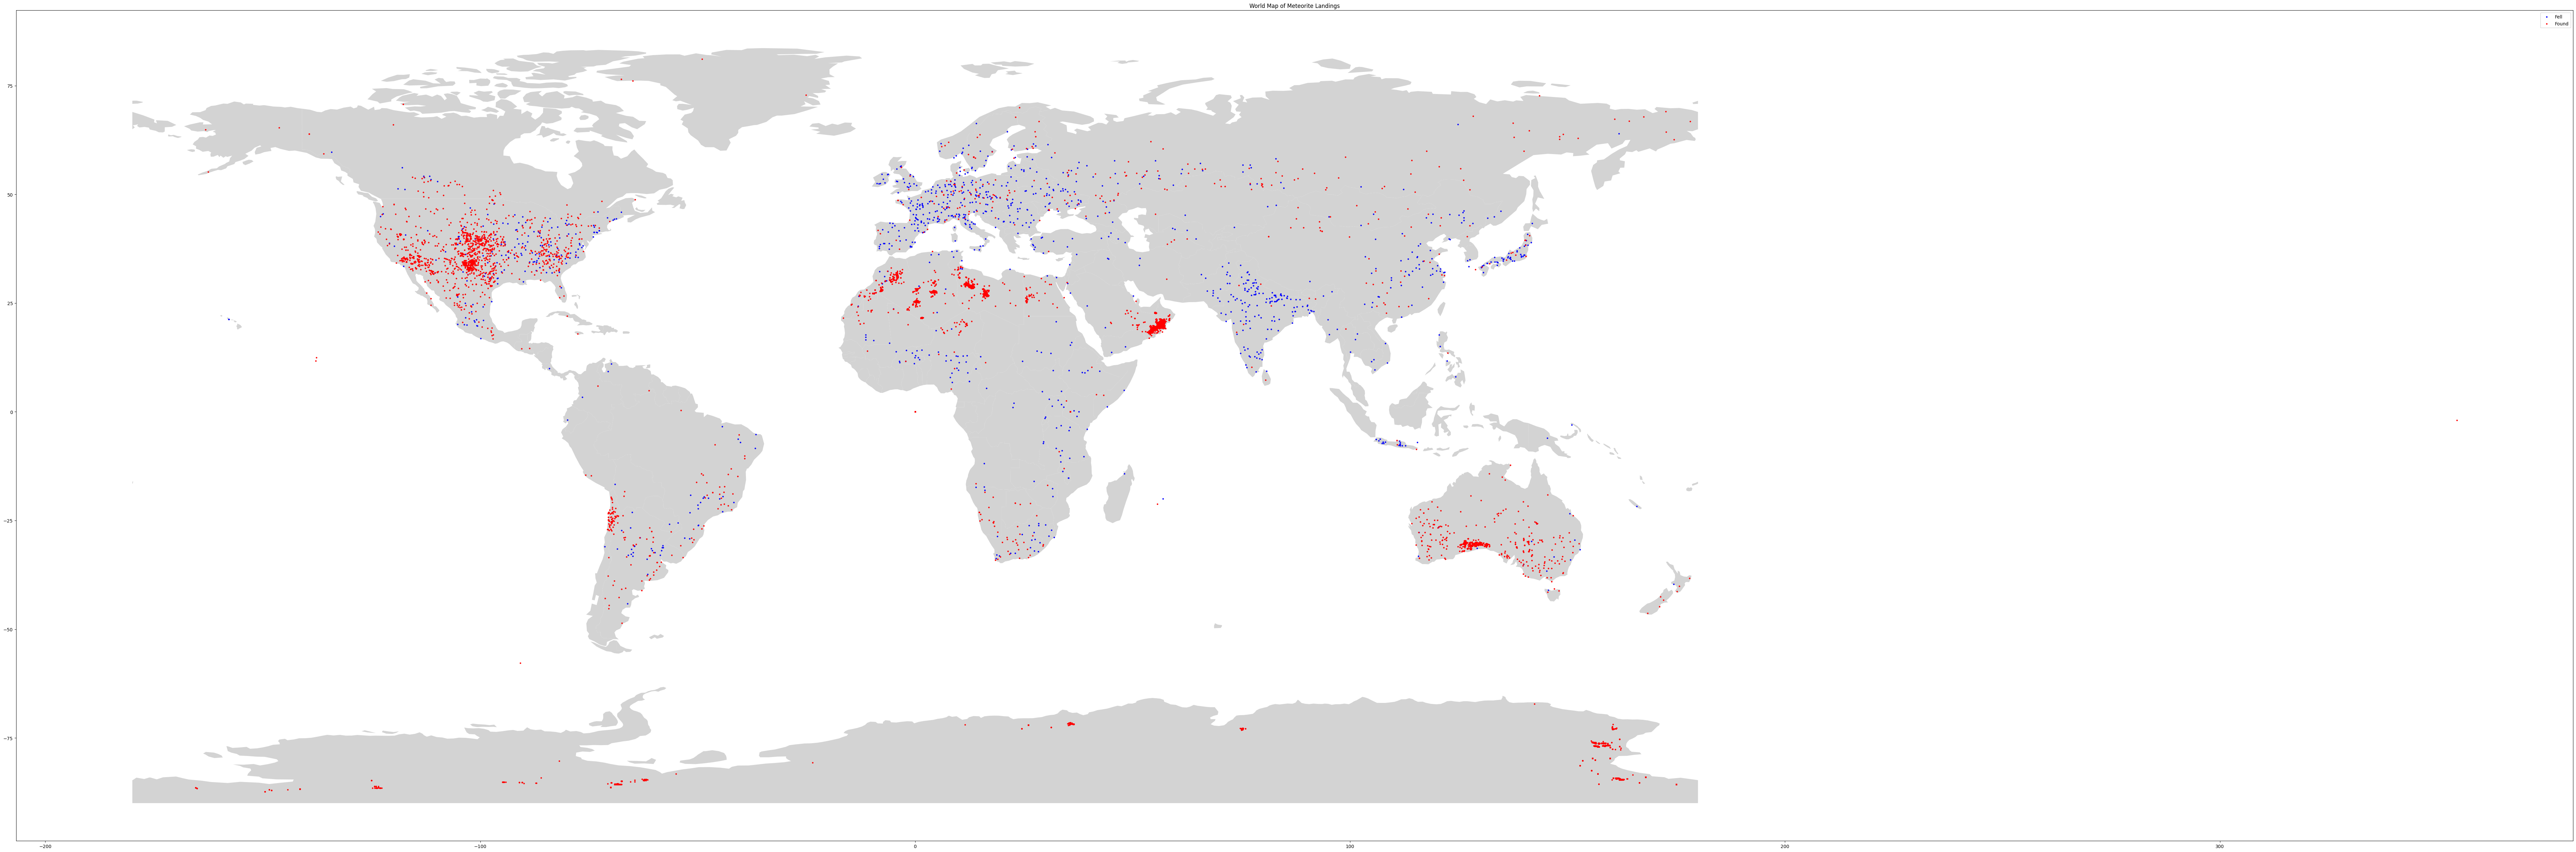

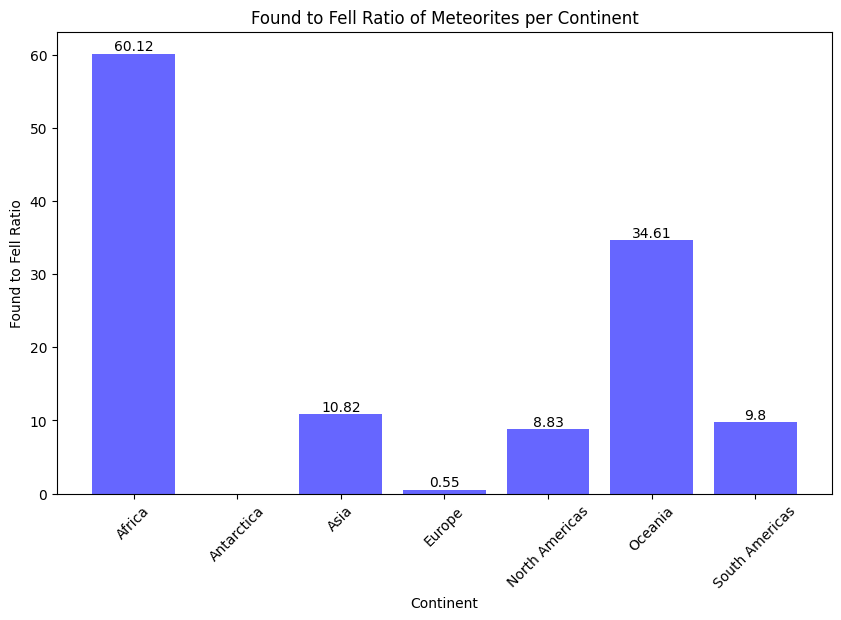

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

file_path = '/content/get_continent.csv'
meteorites_df = pd.read_csv(file_path)

meteorites_df.dropna(subset=['reclat', 'reclong'], inplace=True)

geometry = [Point(xy) for xy in zip(meteorites_df['reclong'], meteorites_df['reclat'])]
geo_meteorites_df = gpd.GeoDataFrame(meteorites_df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(100, 80))

world.plot(ax=ax, color='lightgrey')

fell = geo_meteorites_df[geo_meteorites_df['fall'] == 'Fell']
found = geo_meteorites_df[geo_meteorites_df['fall'] == 'Found']

fell.plot(ax=ax, color='blue', markersize=5, label='Fell')
found.plot(ax=ax, color='red', markersize=5, label='Found')

ax.legend()
ax.set_title('World Map of Meteorite Landings')

plt.show()








files = pd.read_csv('/content/get_continent.csv')
sample_data = {
    'Name': files['recclass'],
    'Mass (g)': files['mass (g)'],
    'Fall': files['fall'],
    'Year': files['year'],
    'Latitude': files['reclat'],
    'Longitude': files['reclong'],
    'Continent': files['Continent']
}

meteorites_df = pd.DataFrame(sample_data)

fell_found_counts = meteorites_df.groupby(['Continent', 'Fall']).size().unstack(fill_value=0)
fell_found_ratio = fell_found_counts['Found']/fell_found_counts['Fell']
fell_found_ratio = fell_found_ratio.fillna(0)

plt.figure(figsize=(10, 6))
bars = plt.bar(fell_found_ratio.index, fell_found_ratio.values, color='blue', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Continent')
plt.ylabel('Found to Fell Ratio')
plt.title('Found to Fell Ratio of Meteorites per Continent')
plt.xticks(rotation=45)

plt.show()